# Part I - (Prosper Loan Data Exploration)
## by (Akpan Enwongo Boniface)

## Introduction

[Prosper](https://www.prosper.com/) is a peer to peer marketplace lending platform founded in 2005. It was the first of its kind in the United States.

Prosper offers unsecured loans which do not require collateral. However, individuals must have a credit score equal to or greater than 640 to qualify. 

A credit score predicts the individual's likeliness to pay the loan on time, based on information from credit reports.

In this Project, I will explore the Prosper dataset as at the 3rd of November 2014, which contains 113,937 loans with 81 variables on each loan. The focus will be on 15 variables.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset.
prosper = pd.read_csv('prosperLoanData.csv', sep=',')

In [3]:
# check shape
prosper.shape

(113937, 81)

In [4]:
# check data types
prosper.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [5]:
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# select 15 variables to focus on.

df = prosper[['ListingNumber', 'Term', 'LoanStatus', 'LoanCurrentDaysDelinquent', 'LenderYield', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'CreditScoreRangeLower', 'IncomeRange', 'BorrowerAPR', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'ProsperRating (Alpha)', 'Occupation']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingNumber                 113937 non-null int64
Term                          113937 non-null int64
LoanStatus                    113937 non-null object
LoanCurrentDaysDelinquent     113937 non-null int64
LenderYield                   113937 non-null float64
ListingCategory (numeric)     113937 non-null int64
BorrowerState                 108422 non-null object
EmploymentStatus              111682 non-null object
CreditScoreRangeLower         113346 non-null float64
IncomeRange                   113937 non-null object
BorrowerAPR                   113912 non-null float64
LoanMonthsSinceOrigination    113937 non-null int64
LoanOriginalAmount            113937 non-null int64
ProsperRating (Alpha)         84853 non-null object
Occupation                    110349 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 13.0+ MB


In [7]:
df.head()

,ListingNumber,Term,LoanStatus,LoanCurrentDaysDelinquent,LenderYield,ListingCategory (numeric),BorrowerState,EmploymentStatus,CreditScoreRangeLower,IncomeRange,BorrowerAPR,LoanMonthsSinceOrigination,LoanOriginalAmount,ProsperRating (Alpha),Occupation
0,193129,36,Completed,0,0.1380,0,CO,Self-employed,640.0,"$25,000-49,999",0.16516,78,9425,NaN,Other
1,1209647,36,Current,0,0.0820,2,CO,Employed,680.0,"$50,000-74,999",0.12016,0,10000,A,Professional
2,81716,36,Completed,0,0.2400,0,GA,Not available,480.0,Not displayed,0.28269,86,3001,NaN,Other
3,658116,36,Current,0,0.0874,16,GA,Employed,800.0,"$25,000-49,999",0.12528,16,10000,A,Skilled Labor
4,909464,36,Current,0,0.1985,2,MN,Employed,680.0,"$100,000+",0.24614,6,15000,D,Executive


In [8]:
# convert ProsperRating (Alpha), ProsperScore and IncomeRange into ordered categorical types

ordinal_var_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    

In [9]:
# rename columns with brackets
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)

In [10]:
#check
df.dtypes

ListingNumber                    int64
Term                             int64
LoanStatus                      object
LoanCurrentDaysDelinquent        int64
LenderYield                    float64
ListingCategory                  int64
BorrowerState                   object
EmploymentStatus                object
CreditScoreRangeLower          float64
IncomeRange                   category
BorrowerAPR                    float64
LoanMonthsSinceOrigination       int64
LoanOriginalAmount               int64
ProsperRating                 category
Occupation                      object
dtype: object

In [11]:
# check for duplicates
df[df.ListingNumber.duplicated() == True].count()['ListingNumber']

871

In [12]:
#drop duplicates
df.drop_duplicates(inplace=True)
df[df.ListingNumber.duplicated() == True].count()['ListingNumber']

0

In [13]:
#Change datatype columns with nomimal categorical data
df['Occupation'] = df['Occupation'].astype('category')
df['BorrowerState'] = df['BorrowerState'].astype('category')
df['LoanStatus'] = df['LoanStatus'].astype('category')
df['ListingCategory'] = df['ListingCategory'].astype('category')
df['Term'] = df['Term'].astype('category')
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 15 columns):
ListingNumber                 113066 non-null int64
Term                          113066 non-null category
LoanStatus                    113066 non-null category
LoanCurrentDaysDelinquent     113066 non-null int64
LenderYield                   113066 non-null float64
ListingCategory               113066 non-null category
BorrowerState                 107551 non-null category
EmploymentStatus              110811 non-null category
CreditScoreRangeLower         112475 non-null float64
IncomeRange                   104519 non-null category
BorrowerAPR                   113041 non-null float64
LoanMonthsSinceOrigination    113066 non-null int64
LoanOriginalAmount            113066 non-null int64
ProsperRating                 83982 non-null category
Occupation                    109537 non-null category
dtypes: category(8), float64(3), int64(4)
memory usage: 7.8 MB


,ListingNumber,LoanCurrentDaysDelinquent,LenderYield,CreditScoreRangeLower,BorrowerAPR,LoanMonthsSinceOrigination,LoanOriginalAmount
count,1.130660e+05,113066.000000,113066.000000,112475.000000,113041.000000,113066.000000,113066.000000
mean,6.248036e+05,153.991403,0.182882,685.524961,0.218980,32.121770,8314.762307
std,3.273262e+05,467.919931,0.074612,66.635895,0.080483,29.978915,6237.007841
min,4.000000e+00,0.000000,-0.010000,0.000000,0.006530,0.000000,1000.000000
25%,3.976670e+05,0.000000,0.124500,660.000000,0.156290,6.000000,4000.000000
50%,5.978385e+05,0.000000,0.174000,680.000000,0.209840,21.000000,6300.000000
75%,8.849650e+05,0.000000,0.240600,720.000000,0.283860,66.000000,12000.000000
max,1.255725e+06,2704.000000,0.492500,880.000000,0.512290,100.000000,35000.000000


### What is the structure of your dataset?

The dataset contains 113066 entries with 15 culled out variables (ListingNumber Term, LoanStatus,  LoanCurrentDaysDelinquent, LenderYield, ListingCategory, BorrowerState, EmploymentStatus, CreditScoreRangeLower, IncomeRange, BorrowerAPR, LoanMonthsSinceOrigination, LoanOriginalAmount, ProsperRating and Occupation). There are seven numerical variables and eight categorical variable, wherein, ProsPerRating and Income Range are ordinal variables.

Lowest Risk to Highest Risk for ProsPerRating: AA, A, B, C, D, E, HR

Lowest to Highest Income Range: \\$0, \\$1-24,999, \\$25,000-49,999, \\$50,000-74,999, \\$75,000-99,999, \\$100,000+

### What is/are the main feature(s) of interest in your dataset?

My interest lies in the Loanstatus, LoanOriginalAmount and Incomerange.
,
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I'm thinking that Term, LenderYield, ProsperRating, LoanCurrentDaysDelinquent and Loan Month since Origination will support investigations into the main features.



## Univariate Exploration


In [15]:
# def function to plot count.

def plot_count(dataframe,column_name):
    base_color = sb.color_palette()[0]
    cat_order = dataframe[column_name].value_counts().index
    plot=sb.countplot(data=dataframe, x=column_name, color=base_color, order=cat_order)
    plt.xticks(rotation=90);
    return(plot)

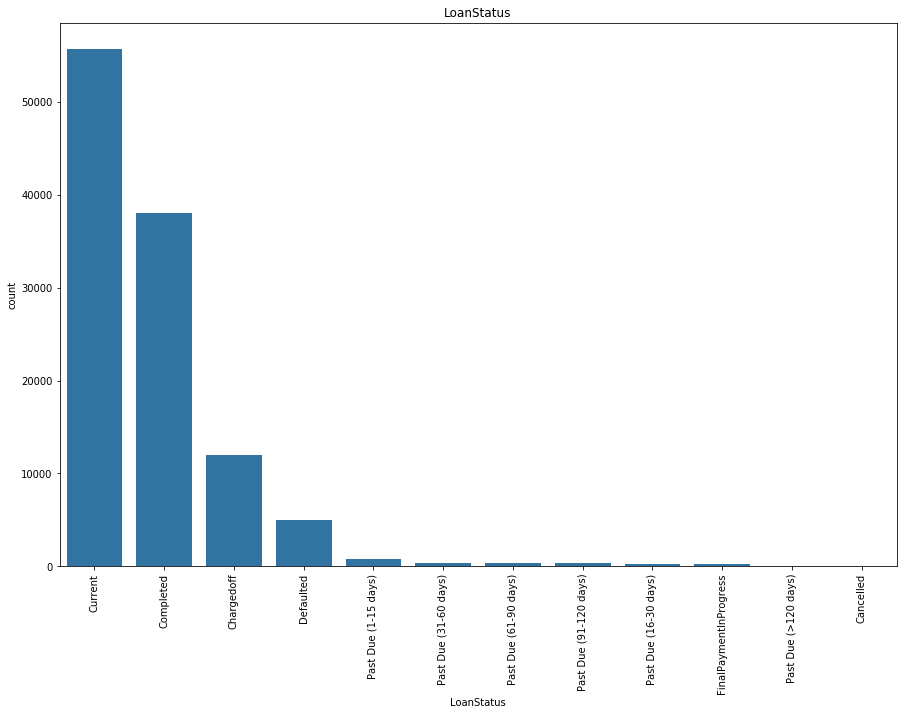

In [16]:
# Comparing the LoanStatus. Are the borrowers paying up their loans?

plt.figure(figsize=[15, 10])
plot_count(df, 'LoanStatus');
plt.title('LoanStatus');

We can see that most loans are current loans. We also have a good number of completed loans compared to the ones in the delinquency bucket (Past Due). We can say that the most borrowers pay their debts.

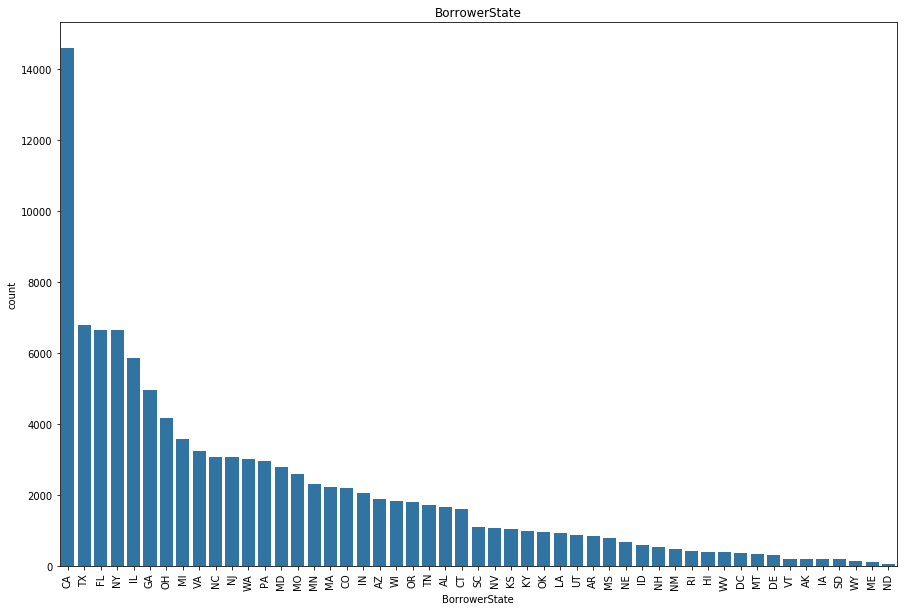

In [17]:
# State Distribution of Borrowers. What are the top borrower states?

plt.figure(figsize=[15, 10])
plot_count(df, 'BorrowerState');
plt.title('BorrowerState');


From the chart, we can say that California had the leading number of borrowers in the top five category, followed by Texas, Florida, New York, Ilinois and Georgia.

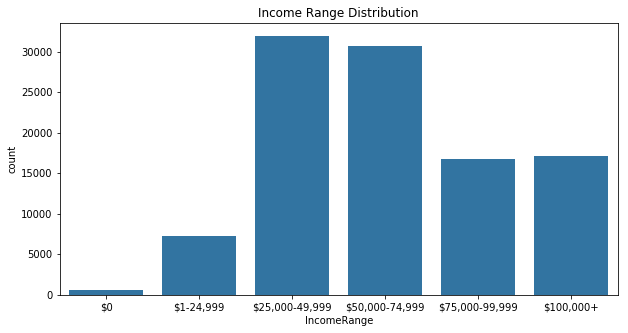

In [18]:
# View the Income Range. The borrowers consists of customers with what salary range? We'll look at the top three.

base_color = sb.color_palette()[0]

plt.figure(figsize=[10, 5])
sb.countplot(data=df,x='IncomeRange',color=base_color);
plt.title('Income Range Distribution');

The top three range of borrowers constitute earners with a salary range of \\$25,000 to \\$49,999 followed by \\$50,000 to \\$74,999 and then \\$75,000 to $99,999.

Text(0.5,1,'ListingCategory')

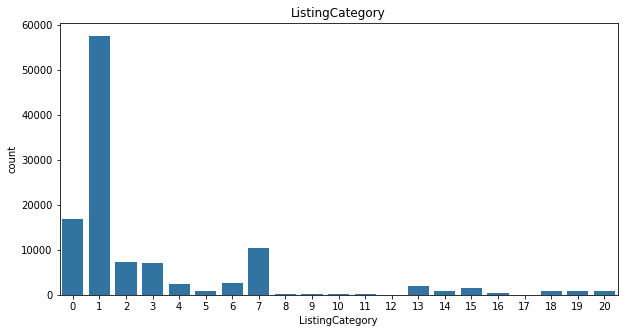

In [19]:
# What do most borrowers use the loaned money for?

plt.figure(figsize=[10, 5])
sb.countplot(data=df,x='ListingCategory',color=base_color);
plt.title('ListingCategory')


Looking at the chart above, most borrowers obtain loans to pay back debts (debt consolidation). Borrowers who do not select any listing (Not available) are in second place, then borrowers who pick others third place. We can say that a lot of borrowers do not state what they intend to use the loan for.


0 - Not Available, 
1 - Debt Consolidation, 
2 - Home Improvement, 
3 - Business
4 - Personal Loan
5 - Student Use
6 - Auto
7- Other
8 - Baby&Adoption
9 - Boat
10 - Cosmetic Procedure
11 - Engagement Ring
12 - Green Loans
13 - Household Expenses
14 - Large Purchases
15 - Medical/Dental
16 - Motorcycle
17 - RV
18 - Taxes
19 - Vacation
20 - Wedding Loans

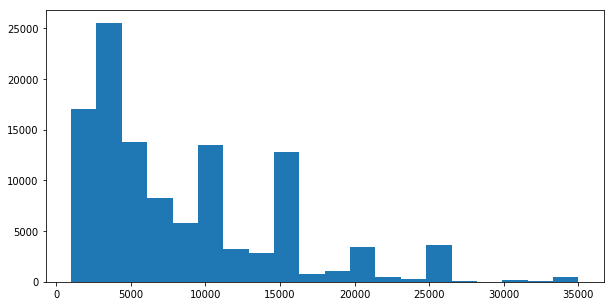

In [20]:
#Find the amount most borrowers borrow

plt.figure(figsize=[10, 5])
plt.hist(df['LoanOriginalAmount'], bins=20)
plt.show()

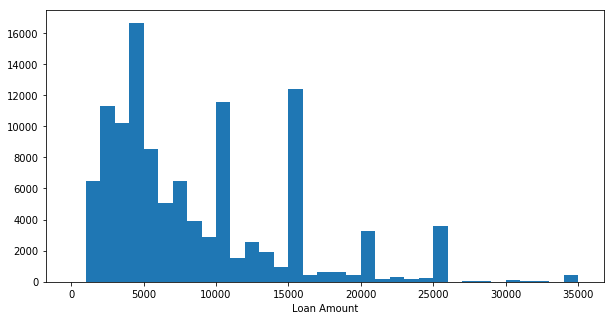

In [21]:
# Create bins with step-size 1000 for clearer depictions.
plt.figure(figsize=[10, 5])
bins = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
plt.xlabel('Loan Amount')
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins);

From the chart, a unimodal distribution is observed. 26,000 data points fall between the range of \\$2,500 and \\$4,000.

We have more borrowers for amounts bewteen \\$1,000 and \\$16,000 below and less borrowers for amounts above \\$16,000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Loan status, Listing category,State disribution and Income range are categorical data and visualization was done using the bar chart. For loan status, there were more distribution on current loans, while for Income range, we had more distribution for salary range of \\$25,000 to \\$49,999 followed by \\$50,000 to \\$74,999 and then \\$75,000 to \\$99,999.

Loan Original amount which is numerical was visualized using histogram. A unimodal distribution was observed with 26,000 data points falling between the range of \\$2,500 and \\$4,000.

For listing category, we had more distributionn for debt consolidation followed by Not available.

I did not observe any outliers, hence, no transformation was done.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distribution was observed, hence, no transformation was done.

## Bivariate Exploration

In [22]:
# check basic details of variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 15 columns):
ListingNumber                 113066 non-null int64
Term                          113066 non-null category
LoanStatus                    113066 non-null category
LoanCurrentDaysDelinquent     113066 non-null int64
LenderYield                   113066 non-null float64
ListingCategory               113066 non-null category
BorrowerState                 107551 non-null category
EmploymentStatus              110811 non-null category
CreditScoreRangeLower         112475 non-null float64
IncomeRange                   104519 non-null category
BorrowerAPR                   113041 non-null float64
LoanMonthsSinceOrigination    113066 non-null int64
LoanOriginalAmount            113066 non-null int64
ProsperRating                 83982 non-null category
Occupation                    109537 non-null category
dtypes: category(8), float64(3), int64(4)
memory usage: 12.8 MB


Text(0,0.5,'Months since Loan Origination')

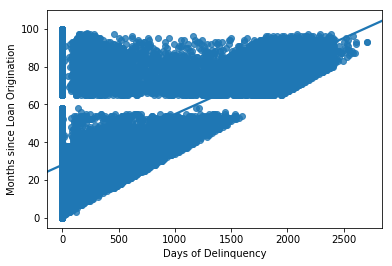

In [23]:
#Let's view the relationship between two numerical data-LoanCurrentDaysDelinquent and LoanMonthsSinceOrigination.

sb.regplot(data = df, x = 'LoanCurrentDaysDelinquent', y = 'LoanMonthsSinceOrigination');
plt.xlabel('Days of Delinquency')
plt.ylabel('Months since Loan Origination')

The visualization is overplotted due to large number of plotting points. We will plot a sample of the data next for clear depictions.

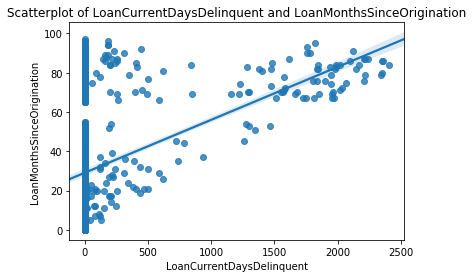

In [24]:
# Plotting of only 1000 samples.

samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

plt.title('Scatterplot of LoanCurrentDaysDelinquent and LoanMonthsSinceOrigination')
sb.regplot(data = df_samp, x = 'LoanCurrentDaysDelinquent', y = 'LoanMonthsSinceOrigination', truncate=False, x_jitter=0.3);

LoanCurrentDaysDelinquent and LoanMonthsSinceOrigination are positively correlated as seen from the plot above.

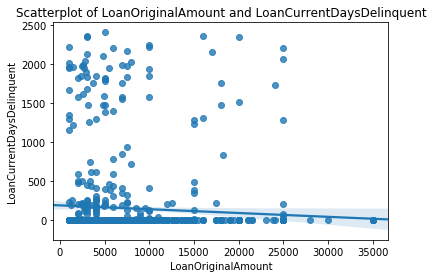

In [25]:
#Let's view the relationship between two numerical data-LoanOriginalAmount and LoanCurrentDaysDelinquent using sample data.
plt.title('Scatterplot of LoanOriginalAmount and LoanCurrentDaysDelinquent')
sb.regplot(data = df_samp, x = 'LoanOriginalAmount', y = 'LoanCurrentDaysDelinquent', truncate=False, x_jitter=0.3);

The LoanOriginalAmount and LoanCurrentDaysDelinquent are not correlated.

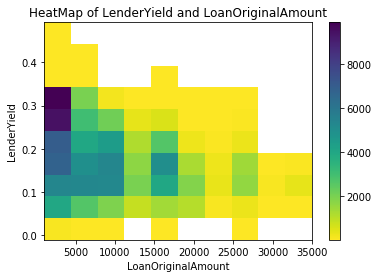

In [26]:
#Let's view the relationship between two numerical data-LenderYield and LoanOriginalAmount using heat map on full data.

plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'LenderYield', cmin=0.5, cmap='viridis_r');
plt.colorbar()
plt.title('HeatMap of LenderYield and LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('LenderYield');

We can observe a negative correlation between the lender yield and the loan original amount. Higher amounts have lessee yield percentages and vice versa.

(-0.052973620191820767, 0.53547362019182076)

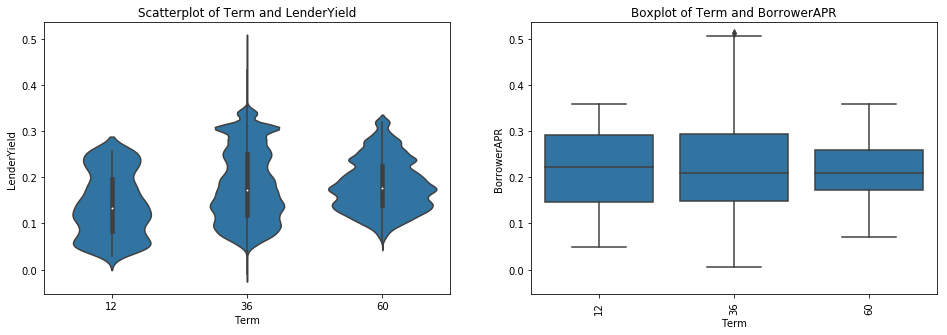

In [27]:
#Let's view the relationship between a numerical data and qualitative data.
#1. LenderYield and Term
#2. Term and BorrowerAPR


plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
ax1 = plt.subplot(1, 2, 1)
plt.title('Scatterplot of Term and LenderYield')
sb.violinplot(data=df, x='Term', y='LenderYield', color = base_color);


# right plot: box plot
plt.subplot(1, 2, 2)
plt.title('Boxplot of Term and BorrowerAPR')
sb.boxplot(data = df, x = 'Term', y = 'BorrowerAPR', color = base_color);
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot






From the violin plot, the lender yeild is most when the term is 36 days. From the boxplot, the 12 month term has the highest Borrower Annual Percentage Loan rate. There are also a few outliers at term 36.

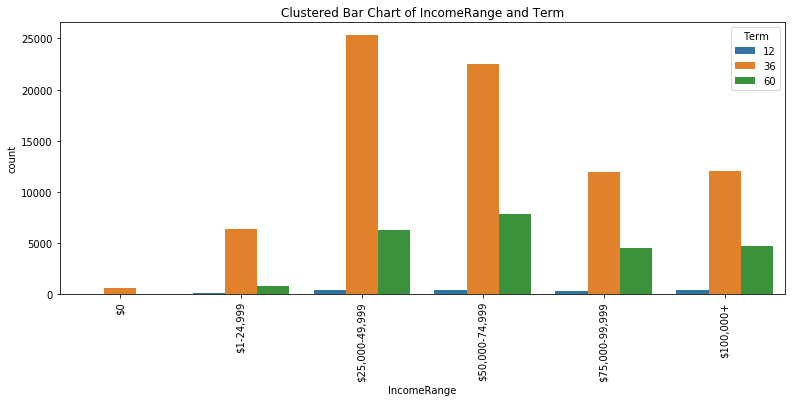

In [28]:
#Let's view the relationship between two categorical data.

plt.figure(figsize = [13, 5])
plt.title('Clustered Bar Chart of IncomeRange and Term')
plt.xticks(rotation=90);
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term');

Here, it is observed that the 36-month term is the most common among all income range.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


LoanCurrentDaysDelinquent is not correlated with LoanOriginalAmount and positively correlated with LoanMonthsSinceOrigination.

Here, it is observed that the 36-month term is the most common among all income range.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

A negative correlation was observed between the lender yield and the loan original amount. Higher amounts have lesser yield percentages and vice versa.

Also, the LoanCurrentDaysDelinquent and LoanOriginalAmount are not correlated.

The lender yield is most when the term is 60 day. The 12 month term has the highest Borrower Annual Percentage Loan rate. There are also a few outliers at term 36.


## Multivariate Exploration

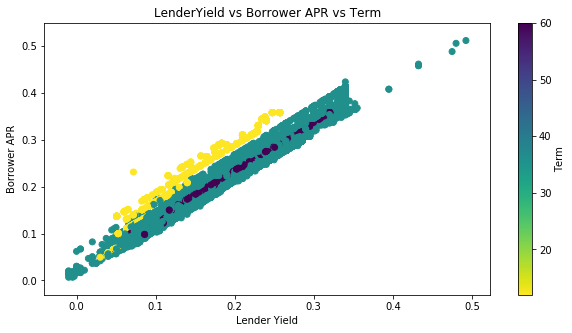

In [29]:
# Compare LenderYield with Borrower APR and Term
plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='LenderYield',y = 'BorrowerAPR',c='Term',cmap = 'viridis_r')
plt.colorbar(label = 'Term');
plt.title('LenderYield vs Borrower APR vs Term');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');




The lender Yield is positively correlated with the Borrower APR, as an increase in the Borrower APR caused an increase in the LenderYield. The lowest and highest Borrower APR and lenderYield occurs in the term with 36 months.

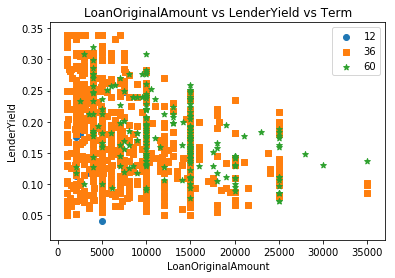

In [30]:
#Compare loanOriginalAmount, lenderYeild with Term. 

term_markers = [[12, 'o'],
                [36, 's'],
                [60, '*']]

for term, marker in term_markers:
    df_term = df_samp[df_samp['Term'] == term]
    
    plt.scatter(data = df_term, x = 'LoanOriginalAmount', y = 'LenderYield', marker = marker);
plt.legend(['12','36','60']);
plt.title('LoanOriginalAmount vs LenderYield vs Term');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('LenderYield');

Here, we can see that the 12-month term has the least distribution and lenderYield, with loan amounts between \\$2,400 and \\$5,000. The 36 month term is the most widely spread between loan amounts of \\$1,000 to \\$35,000 with the highest lenderYield.

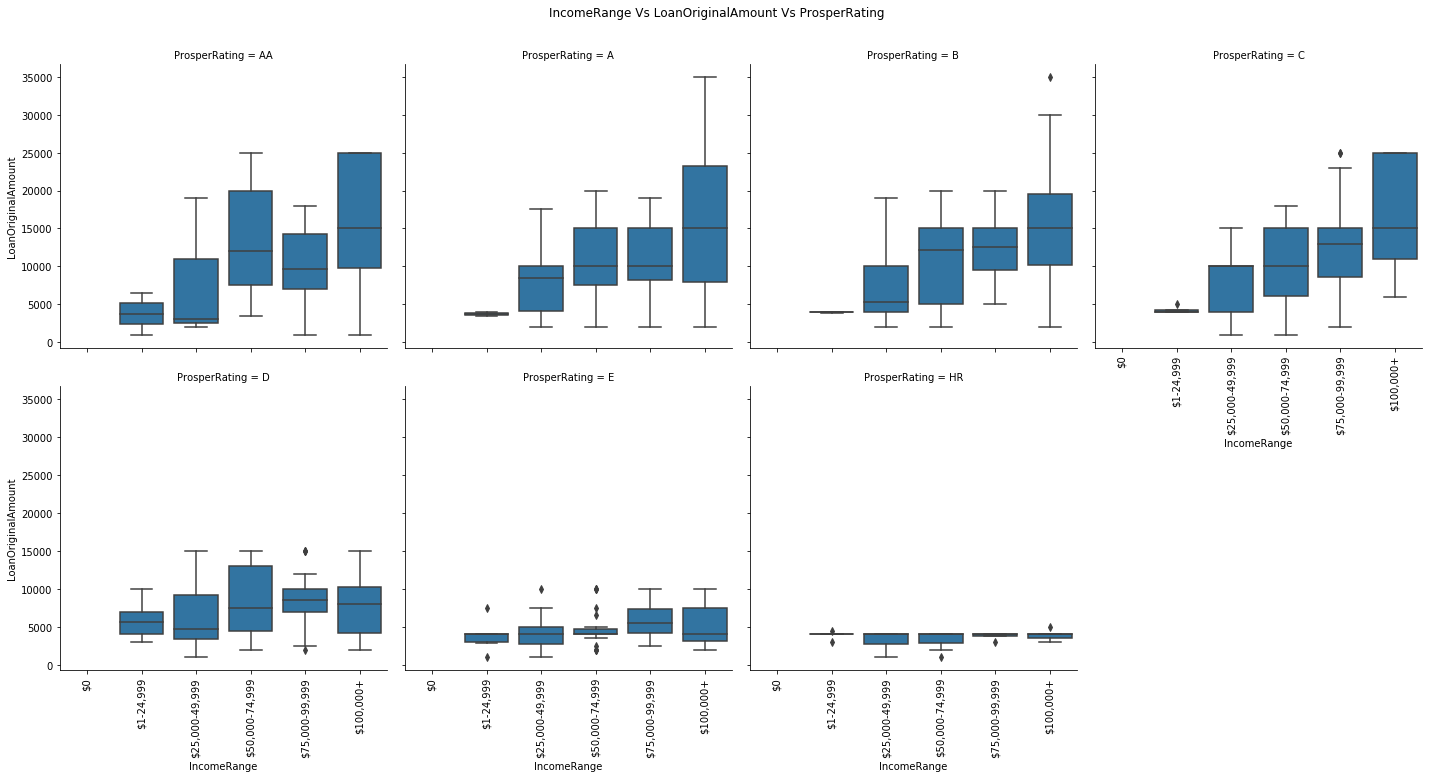

In [31]:
# Comparing the relationship between IncomeRange, LoanOriginalAmount and ProsperRating using sampled data set.

g=sb.FacetGrid(data=df_samp, col='ProsperRating', size=5, col_wrap=4)
g.map(sb.boxplot, 'IncomeRange', 'LoanOriginalAmount');
g.set_xticklabels(rotation=90);
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('IncomeRange Vs LoanOriginalAmount Vs ProsperRating');

From the plot, we can see the Loan Original Amount decreases as the risk (ProsperRating) increases.The loan Original Amount increases with the income range but there are exceptions in ProsperRating E and HR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A postive correlation was observed between the Lender Yield and Borrower APR. Both are at the lowest in the 12 month term and at the highest in the 36 month term. We also observed that the loan original amount was highest for borrowers with lower risk grade (A, AA), it then reduces as the risk increases.

### Were there any interesting or surprising interactions between features?

There is no correlation between the loan amount and term.

## Conclusions

From the visualizations, it is safe to invest in Prosper as most loans are in the current state and there are more completed loans compared to the ones in the delinquency bucket (past due date). California was the state with the highest number of borrowers. The borrowers constituted more of individuals with salary range bewteen \\$25,000 to \\$49,999. It was also observed that majority of the borrowers acquired loans to pay debts (debt consolidation).

Most borrowers acquire loans within the range of \\$1,000 to \\$16,000.

The days of delinquency increases as the loan months increases. The 36-month term is the most common term. There was no correlation between LoanCurrentDaysDelinquent and LoanOriginalAmount. Hence, the chances of a customer defaulting in payment can not be ascertained by the loaned amount.

The Borrower APR increases with the LenderYield with the lowest and highest points occuring  at the term with 36 months.

Also, we observed that the Loan original Amount increases with income range except at the highest risk levels - PropserRating E and HR. 

Finally, the lower ProsperRating, the higher the loan original amount.

